Exploratory data analysis is a crucial step in the data science workflow, but it isn't the end! Now it's time to learn techniques and considerations you can use to successfully move forward with your projects after you've finished exploring!

## Considerations for categorical data

#### Checking for class imbalance
The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

In [2]:
import pandas as pd

salaries = pd.read_csv('ds_salaries_clean.csv')
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


In [3]:
# Print the relative frequency of Job_Category
print(salaries['Designation'].value_counts(normalize = True))

Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Machine Learning Scientist                  0.013180
Big Data Engineer                           0.013180
Data Analytics Manager                      0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Principal Data Scientist                    0.011532
Director of Data Science                    0.011532
ML Engineer                                 0.009885
BI Data Analyst                             0.009885
Computer Vision Engineer                    0.009885
Lead Data Engineer                          0.009885
Head of Data                                0.

Fantastic relative frequency calculation! It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial roles?

#### Cross-tabulation
Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

pandas has been imported for you as pd.

In [4]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [5]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"]))

Company_Size                               L   M   S
Designation                                         
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

In [7]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

Awesome cross-tabulation! This is a handy function to examine the combination of frequencies, as well as find aggregated statistics. Looks like the largest mean salary is for Managerial data roles in large companies!

## Generating new features

#### Extracting features for correlation
In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as sns, pandas as pd, and matplotlib.pyplot as plt.

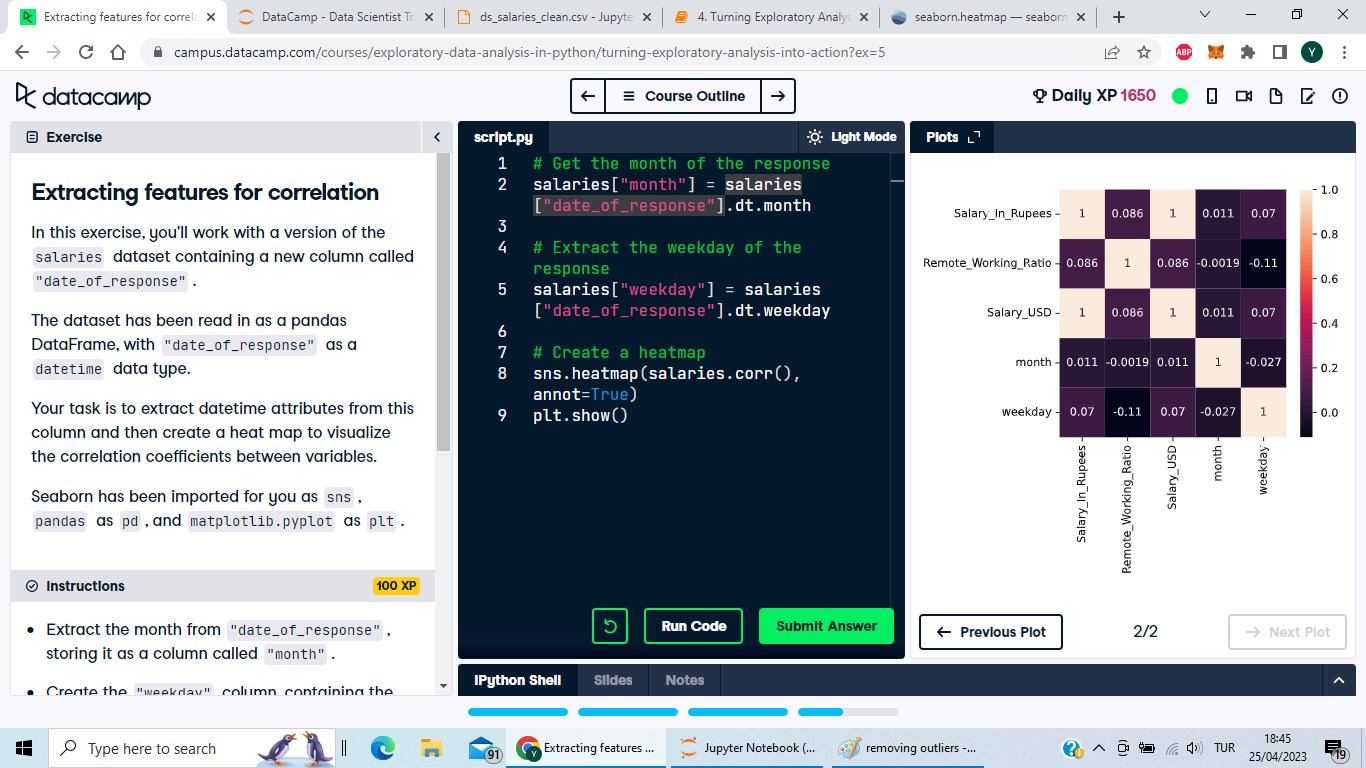

Fantastic feature creation! Looks like there aren't any meaningful relationships between our numeric variables, so let's see if converting numeric data into classes offers additional insights.

#### Calculating salary percentiles
In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

pandas has been imported as pd and the salaries dataset read in as DataFrame called salaries.

In [9]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


Looks like the interquartile range is between 60,881 and 143,225 dollars! Now let's use these variables to add a categorical salary column into the DataFrame!

#### Categorizing salaries
Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

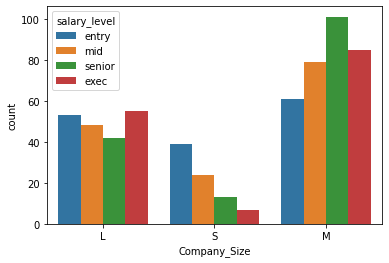

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

Nice work! By using pd.cut() to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!

## Generating hypotheses
#### Comparing salaries
Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

The salaries DataFrame has been imported as a pandas DataFrame.

pandas has been imported as pd, maplotlib.pyplot as plt and seaborn as sns.

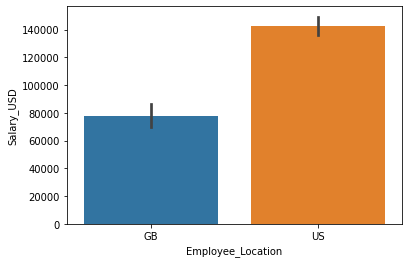

In [12]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

Nicely done! By subsetting the data you were able to directly compare salaries between the USA and Great Britain. The visualization suggests you've generated a hypothesis that is worth formally investigating to determine whether a real difference exists or not!

#### Choosing a hypothesis
You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!<br>
<br>
In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:<br>
<br>
Value	Meaning<br>
CT	Contractor<br>
FL	Freelance<br>
PT	Part-time<br>
FT	Full-time<br>
pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

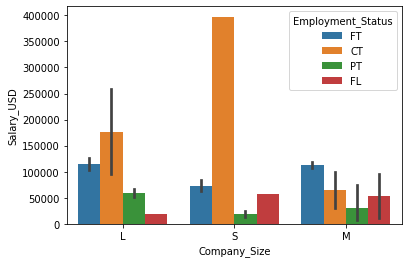

In [13]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

Question
What is a reasonable hypothesis to generate based on this plot?<br>
<br>
a.On average, small companies pay part-time employees less than large companies.<br>
b.Freelancers earn more at medium-sized companies compared to small or large companies.<br>
<strong>c.On average, small companies pay contractors more than large-sized companies.</strong><br>
d.No hypotheses can be generated from this plot.<br>